In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

# libraries for activation functions required
from tensorflow.keras.activations import relu
from tensorflow.keras.activations import softmax


# optimizer library
from tensorflow.keras.optimizers import Adam


In [2]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                    shear_range=0.2,
                                    rotation_range=2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    vertical_flip=True)

#  test data
test_datagen = ImageDataGenerator(
                rescale = 1./255
                )



In [3]:
train_set = train_datagen.flow_from_directory('dataset/Training',
                                              target_size=(224, 224),
                                              class_mode='categorical')                                   

Found 5712 images belonging to 4 classes.


In [4]:
test_set = test_datagen.flow_from_directory('dataset/Testing',
                                            target_size=(224,224),
                                            class_mode='categorical')

Found 1311 images belonging to 4 classes.


In [5]:
class_index = train_set.class_indices
print(class_index)

{'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}


In [6]:
classes = list(class_index.keys())
print(classes)

['glioma', 'meningioma', 'notumor', 'pituitary']


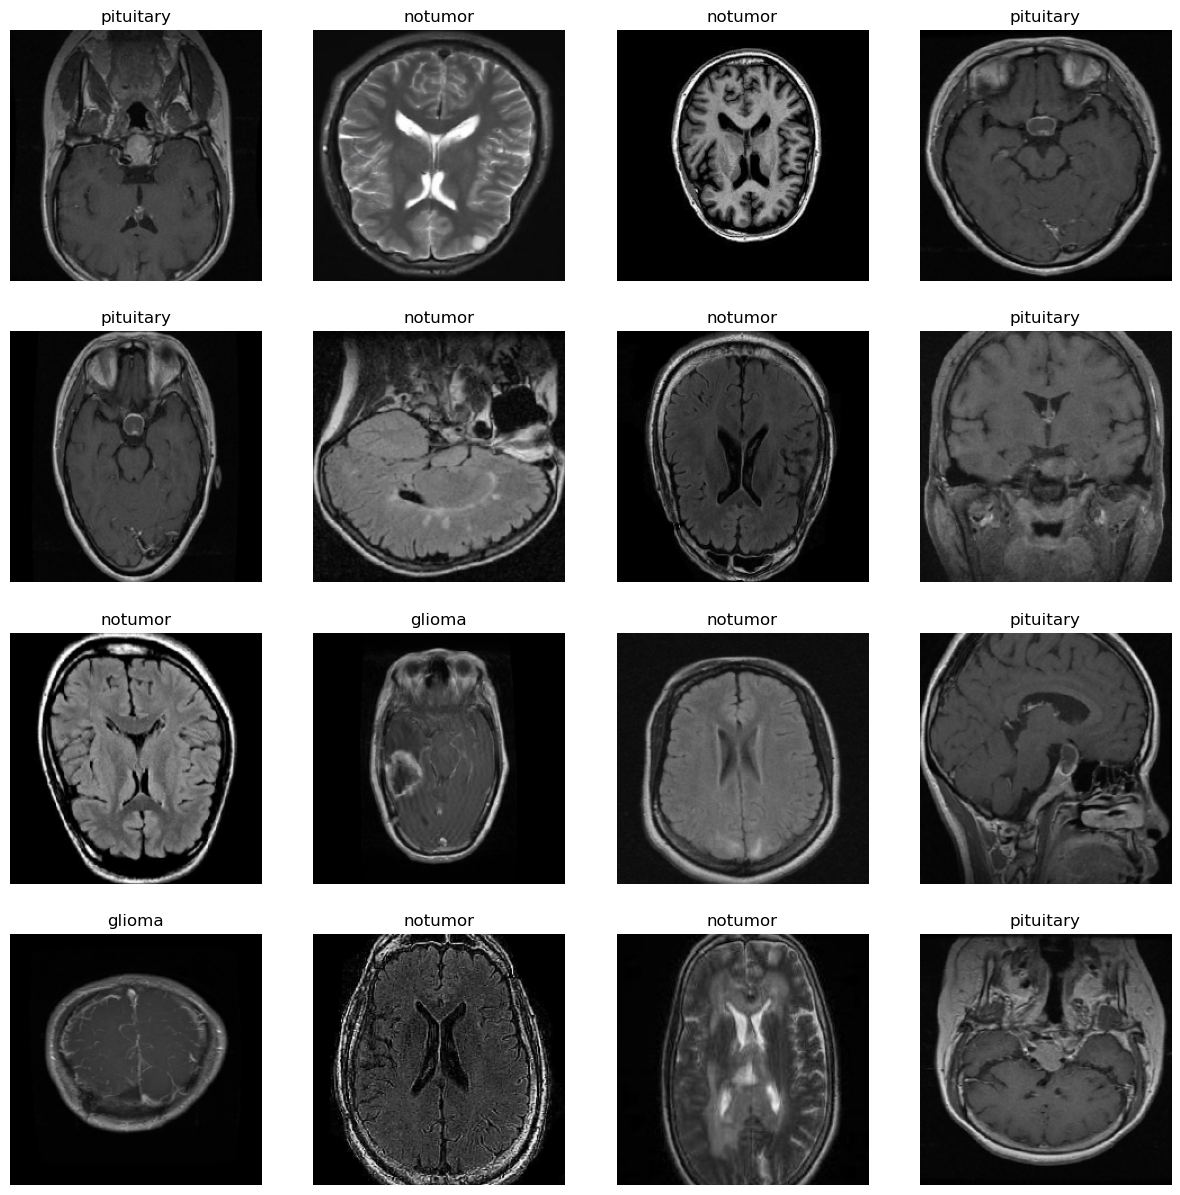

In [7]:
# Display images
# next function iterates over the training set and separates the images and their labels 

x,y = next(train_set)

def display_image(x,y):
    plt.figure(figsize=[15,15])
    for i in range(16):
        plt.subplot(4,4,i+1)
        plt.imshow(x[i])
        plt.title(classes[np.argmax(y[i])])
        plt.axis("off")
    plt.show()

display_image(x,y)             


In [8]:
# Initalizing CNN

cnn = tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters = 32, kernel_size=3,activation=relu,input_shape=[224,224,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size = (2,2),strides  = 2))

cnn.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), padding = 'valid', activation = relu))
cnn.add(tf.keras.layers.MaxPool2D(pool_size = (2,2),strides  = 2, padding = 'valid'))

cnn.add(tf.keras.layers.Conv2D(filters = 128, kernel_size = (3,3), padding = 'valid', activation = relu))
cnn.add(tf.keras.layers.MaxPool2D(pool_size = (2,2),strides  = 2))

cnn.add(tf.keras.layers.Conv2D(filters = 128, kernel_size = (3,3), padding = 'valid', activation = relu))
cnn.add(tf.keras.layers.MaxPool2D(pool_size = (2,2),strides  = 2, padding = 'valid'))


cnn.add(tf.keras.layers.Dropout(0.2))

#Flatten
cnn.add(tf.keras.layers.Flatten())

# Fully Connected Layers
cnn.add(tf.keras.layers.Dense(units = 64 , activation = relu, use_bias = True))

cnn.add(tf.keras.layers.Dense(units = 24 , activation = relu,  use_bias = True))

cnn.add(tf.keras.layers.Dense(units = 4 , activation = softmax))




2024-02-29 11:32:18.617601: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

In [10]:
cnn.compile(loss= "categorical_crossentropy",optimizer = Adam() , metrics = ["accuracy"])

In [11]:
history = cnn.fit(x= train_set ,validation_data= test_set, epochs= 30,verbose = 1 )

Epoch 1/30
179/179 [==============================] - 220s 1s/step - loss: 0.9260 - accuracy: 0.5910 - val_loss: 0.9847 - val_accuracy: 0.6217
Epoch 2/30
179/179 [==============================] - 212s 1s/step - loss: 0.6327 - accuracy: 0.7472 - val_loss: 0.7683 - val_accuracy: 0.7063
Epoch 3/30
179/179 [==============================] - 225s 1s/step - loss: 0.4927 - accuracy: 0.8078 - val_loss: 0.6550 - val_accuracy: 0.7300
Epoch 4/30
179/179 [==============================] - 209s 1s/step - loss: 0.4645 - accuracy: 0.8202 - val_loss: 0.5789 - val_accuracy: 0.7651
Epoch 5/30
179/179 [==============================] - 223s 1s/step - loss: 0.3858 - accuracy: 0.8480 - val_loss: 0.5123 - val_accuracy: 0.8108
Epoch 6/30
179/179 [==============================] - 233s 1s/step - loss: 0.3500 - accuracy: 0.8759 - val_loss: 0.4955 - val_accuracy: 0.8093
Epoch 7/30
179/179 [==============================] - 226s 1s/step - loss: 0.3042 - accuracy: 0.8881 - val_loss: 0.3278 - val_accuracy: 0.8749

In [12]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

[]

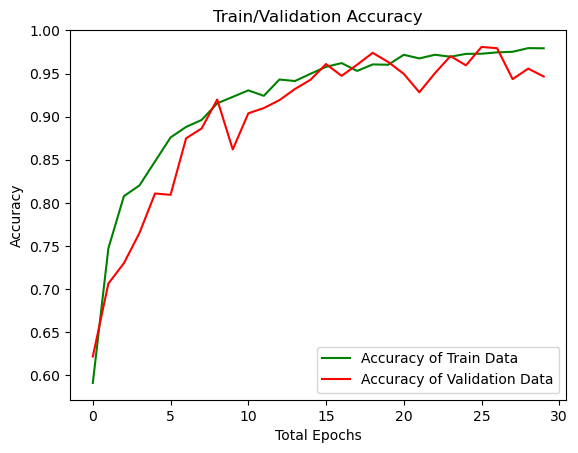

In [13]:
epochs = range(len(history.history['accuracy']))
plt.plot(epochs, history.history['accuracy'], color = 'green', label = 'Accuracy of Train Data')
plt.plot(epochs, history.history['val_accuracy'], color = 'red', label = 'Accuracy of Validation Data')
plt.xlabel('Total Epochs')
plt.ylabel('Accuracy')
plt.title('Train/Validation Accuracy')
plt.legend(loc = 0)
plt.plot()

[]

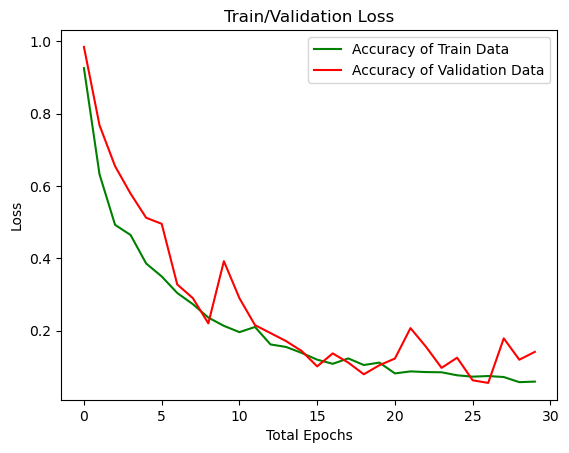

In [14]:
epochs = range(len(history.history['loss']))
plt.plot(epochs, history.history['loss'], color = 'green', label = 'Accuracy of Train Data')
plt.plot(epochs, history.history['val_loss'], color = 'red', label = 'Accuracy of Validation Data')
plt.xlabel('Total Epochs')
plt.ylabel('Loss')
plt.title('Train/Validation Loss')
plt.legend(loc = 0)
plt.plot()

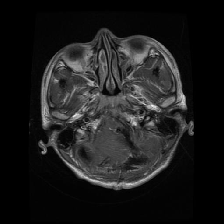

In [19]:
import numpy as np
from keras.utils import load_img,img_to_array
from keras.preprocessing import image

test_image1 = load_img('test_images/glioma.jpg',target_size = (224,224))
test_image1

In [20]:
test_image1 = img_to_array(test_image1)
test_image1 = np.expand_dims(test_image1,axis=0)
result1 = np.argmax(cnn.predict(test_image1/255.0),axis=1)
print(classes[result1[0]])

1/1 [==============================] - 0s 33ms/step
glioma


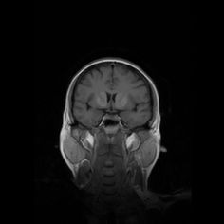

In [26]:
# glioma
import numpy as np
from keras.utils import load_img,img_to_array
from keras.preprocessing import image

test_image2 = load_img('test_images/notumor.jpg',target_size = (224,224))
test_image2

In [27]:
test_image2 = img_to_array(test_image2)
test_image2 = np.expand_dims(test_image2,axis=0)
result2 = np.argmax(cnn.predict(test_image2/255.0),axis=1)
print(classes[result2[0]])

1/1 [==============================] - 0s 35ms/step
notumor


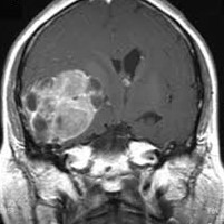

In [28]:
# meningioma
import numpy as np
from keras.utils import load_img,img_to_array
from keras.preprocessing import image

test_image3 = load_img('test_images/meningioma.jpg',target_size = (224,224))
test_image3

In [29]:
test_image3 = img_to_array(test_image3)
test_image3 = np.expand_dims(test_image3,axis=0)
result3 = np.argmax(cnn.predict(test_image3/255.0),axis=1)
print(classes[result3[0]])

1/1 [==============================] - 0s 37ms/step
meningioma


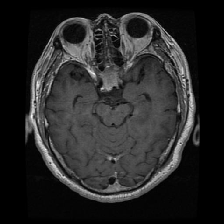

In [30]:
# Pituitary
import numpy as np
from keras.utils import load_img,img_to_array
from keras.preprocessing import image

test_image4 = load_img('pituitary/Te-pi_0031.jpg',target_size = (224,224))
test_image4

In [31]:
test_image4 = img_to_array(test_image4)
test_image4 = np.expand_dims(test_image4,axis=0)
result4 = np.argmax(cnn.predict(test_image4/255.0),axis=1)
print(classes[result4[0]])

1/1 [==============================] - 0s 32ms/step
pituitary


In [34]:
# Get Predictions
preds = cnn.predict(test_set)
y_pred = np.argmax(preds, axis=1) 

41/41 [==============================] - 12s 281ms/step


In [39]:
from sklearn.metrics import classification_report
# Classification report
print(classification_report(test_set.classes, y_pred, target_names= classes))

              precision    recall  f1-score   support

      glioma       0.18      0.15      0.16       300
  meningioma       0.25      0.25      0.25       306
     notumor       0.34      0.36      0.35       405
   pituitary       0.25      0.26      0.25       300

    accuracy                           0.26      1311
   macro avg       0.25      0.26      0.25      1311
weighted avg       0.26      0.26      0.26      1311



In [40]:
#Save the model
cnn.save('Brain_Tumor.h5')